# MultiClass Classification using logistic regression (One vs all)

*__Binary Classification:-__* The output is either 0 or 1 (2 classes). y =2

*__MultiClass Classification:-__* The output is more than 2 classes. y >=3
![title](Figures/OneVsAll.png)

## OneVsAll Concept
![title](Figures/OneVsRest.png)

## Example:-
    1. Handwritten digit recognition:- 1 to 10
    2. Email foldering/tagging:- Works, Friend, Family, Holidays
    3. Medical diagrames:- Not ill,Cold, Flu
    4. Weathers:- Sunny, Cloudy, Rainy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from PIL import Image
from OneVsAllLogisticRegression import *

### Loading Andrew Ng Coursera dataset

In [2]:
mat = scipy.io.loadmat('ex3data1.mat')

In [3]:
X = mat['X']
y = mat['y'].ravel()

In [4]:
X.shape

(5000, 400)

### Random number generator for 100 samples.

In [5]:
n = 100 
index = np.random.choice(X.shape[0], n, replace=False) 
sel = X[index,:]

### Visualizing Handwritten data

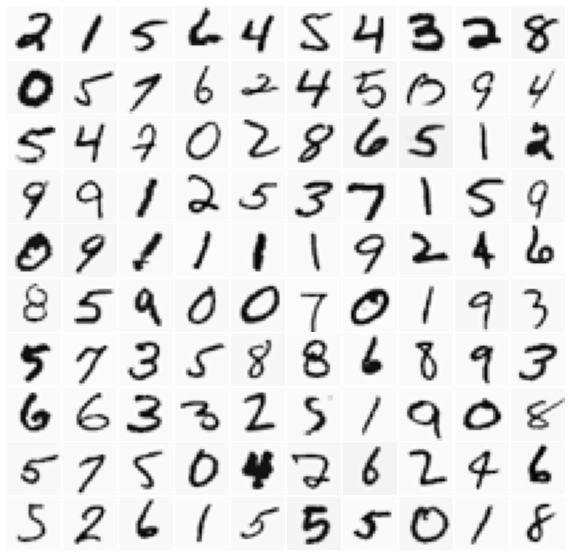

In [6]:
regOneVsall = OneVsall()
regOneVsall.displaydata(sel)

### Append ones in X feature

In [7]:
X = regOneVsall.append_ones(X)
X.shape

(5000, 401)

## Initiate theta with Zeros

In [8]:
initial_theta = np.zeros((X.shape[1],1))
initial_theta.shape

(401, 1)

### Calculate minimum cost using Scipy minimizer function

In [9]:
lambda_coff = 0.1
num_labels = 10
all_theta = regOneVsall.minimumcost(X, y, 10, lambda_coff)

         Current function value: 0.009110
         Iterations: 50
         Function evaluations: 182
         Gradient evaluations: 182
         Current function value: 0.014629
         Iterations: 50
         Function evaluations: 180
         Gradient evaluations: 180
         Current function value: 0.056385
         Iterations: 50
         Function evaluations: 145
         Gradient evaluations: 145
         Current function value: 0.061956
         Iterations: 50
         Function evaluations: 139
         Gradient evaluations: 139
         Current function value: 0.037382
         Iterations: 50
         Function evaluations: 154
         Gradient evaluations: 154
         Current function value: 0.063518
         Iterations: 50
         Function evaluations: 133
         Gradient evaluations: 133
         Current function value: 0.020028
         Iterations: 50
         Function evaluations: 175
         Gradient evaluations: 175
         Current function value: 0.033836
      

In [10]:
ypred = np.argmax(regOneVsall.sigmoid(X @ all_theta.T), axis = 1)
ypred = [y if y else 10 for y in ypred]

In [11]:
regOneVsall.score(y,ypred)

0.9506

### Prediction

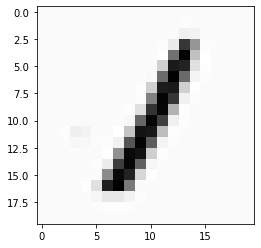

In [12]:
X = mat['X']
plt.imshow(X[800].reshape(20,20,order = 'F'),
                      cmap='Greys')

In [13]:
ypred[800]

1

# Verifying using sklearn logistic model

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs',max_iter = 500,C =0.1)
model.fit(X,y)
model.score(X,y)

0.9336

# One-Hot Encoding

In [15]:
onehot = regOneVsall.Onehot_Encoding(y,10)

In [16]:
y[0]

10

In [17]:
onehot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])